# Modelos Generativos para Recuperação de Informação

Nome: Arthur Pontes Nader

Matrícula: 2019022294

In [1]:
import time
import asyncio
import time

from playwright.async_api import async_playwright

## Processamento dinâmico

### Tarefa 1

In [12]:
async def coletor(url): 
    
    try:
    
        playwright = await async_playwright().start()
        browser = await playwright.chromium.launch(headless = False)
        page = await browser.new_page()
        await page.goto(url)
        
        async with page.expect_download() as download_info:
            await page.locator("button:has-text(\"CSV\")").click()
        download = await download_info.value

        await download.save_as("csv_baixado.csv")
        
        await page.close()
        await browser.close()
    
    except:
        
        print("Erro ao tentar baixar arquivo")
        
        await page.close()
        await browser.close()

In [14]:
loop = asyncio.get_event_loop()
loop.create_task(coletor("https://novoorientedeminas.mg.gov.br/transparencia/pagamentos/detalhes/2023/03/231"))

<Task pending name='Task-21' coro=<coletor() running at /tmp/ipykernel_95789/4136538386.py:1>>

### TaxyAI

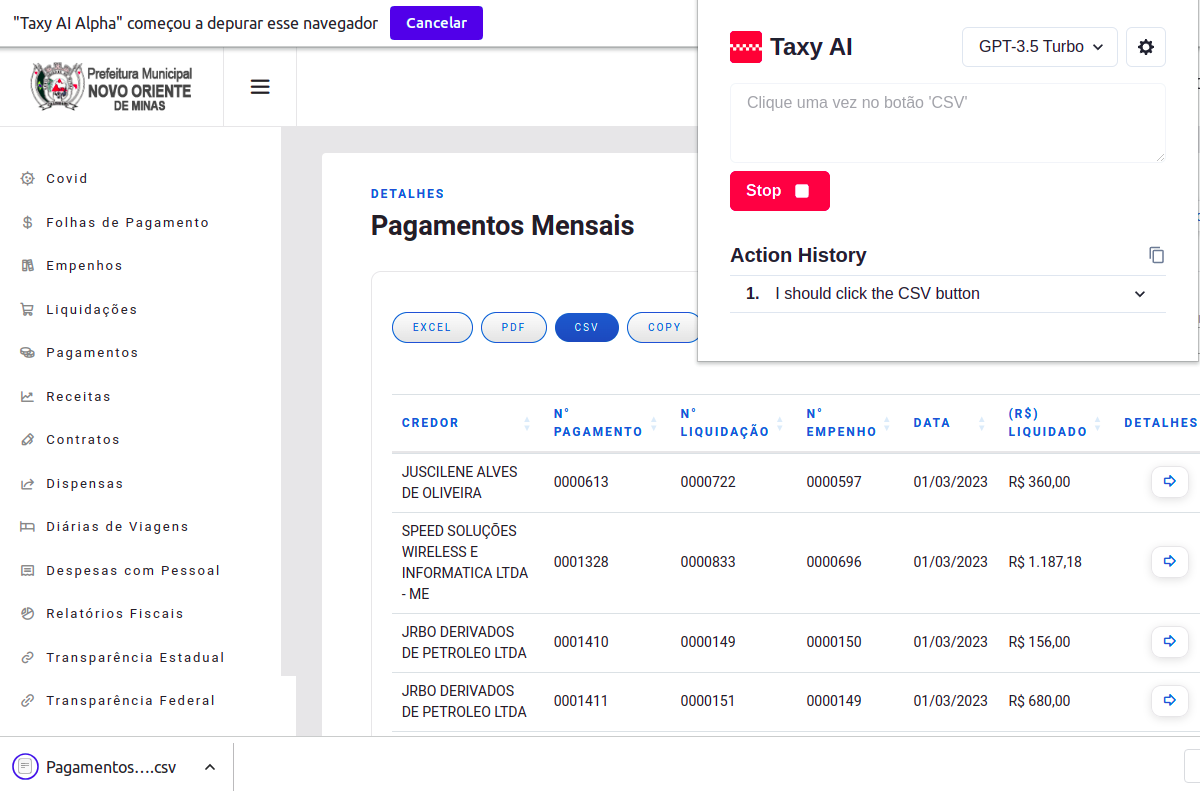

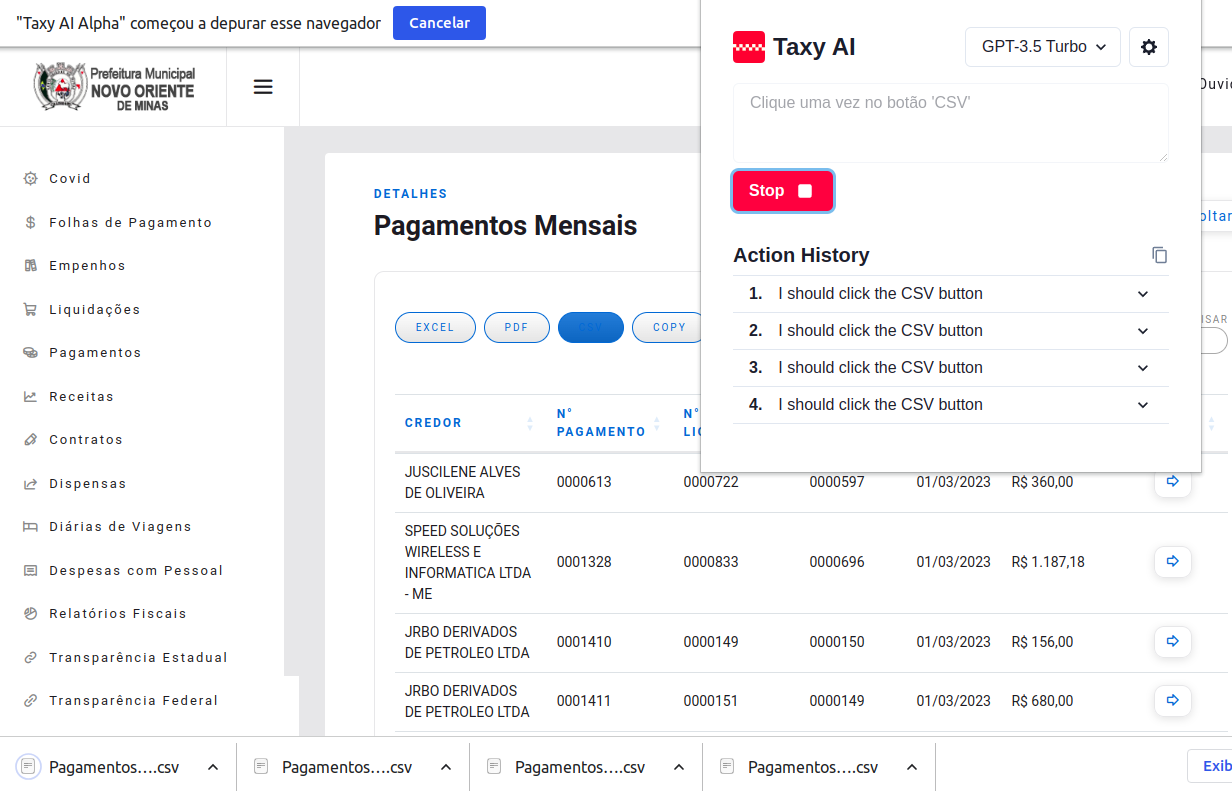

### Tarefa 2

In [41]:
async def screenshot_licitacoes(url):
    
    playwright = await async_playwright().start()
    browser = await playwright.chromium.launch(headless=False)
    page = await browser.new_page()

    await page.goto(url)
    await page.locator("xpath=/html/body/div[5]/div[1]/div[1]/div[2]/div/div[3]/div[3]/div/h4").click()
    await page.locator("xpath=/html/body/div[5]/div[1]/div[1]/div[2]/div/div[2]/div[1]/div/h4").click()
    await page.locator("xpath=/html/body/div[5]/div[1]/div[1]/div[2]/div/div[2]/div[11]/button[2]").click()

    await asyncio.sleep(2)
    await page.screenshot(path='licitacoes.png', full_page=True)

    await page.close()
    await browser.close()

    return url

In [42]:
loop = asyncio.get_event_loop()
loop.create_task(screenshot_licitacoes("http://portal.conquista.mg.gov.br:8080/portalcidadao/#efb33c382dcf9e4ae2294337ce2a566034ee25478c90493e56f55878a4d19d547154abb93a539ca141901243121b0442f68667740d76583a9b6fc842805a701255f50abffb83548323feb3d4a215dcba05fc4b5b868699999c1d78af95bbbed2ae7ab27d940f9f7a8b2debb75557ba1cd7f6303c3be5a0edaecf72a00208c722773c5ec1c75725b2"))

<Task pending name='Task-74' coro=<screenshot_licitacoes() running at /tmp/ipykernel_95789/2814361467.py:1>>

### TaxyAI

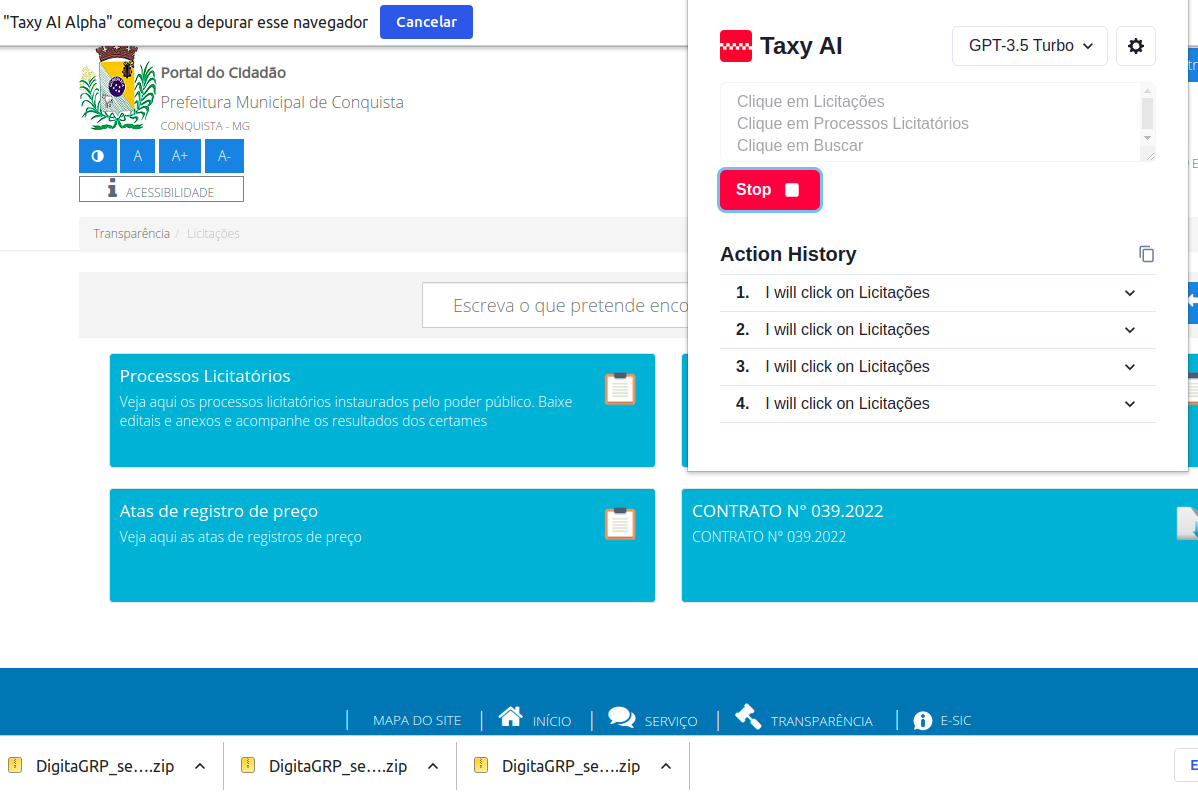

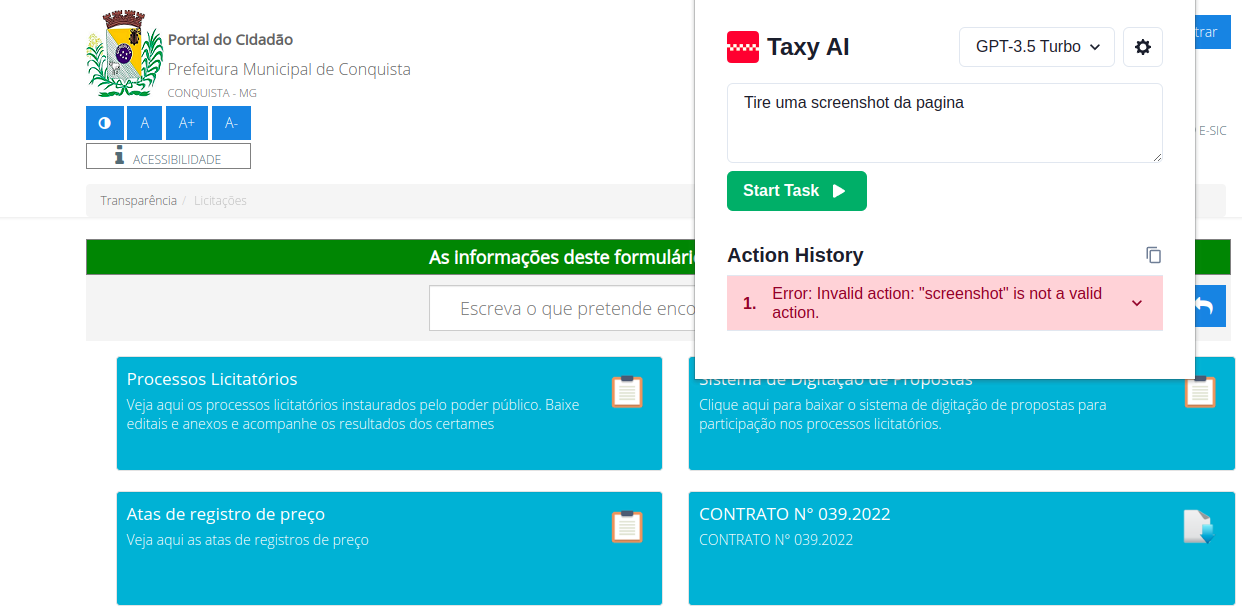

### Tarefa 3

In [7]:
async def gerar_link_prefeitura(cidade):
    
    playwright = await async_playwright().start()
    browser = await playwright.chromium.launch(headless = False)
    page = await browser.new_page()

    await page.goto("https://www.google.com.br/")
    await page.locator("[aria-label=\"Pesquisar\"]").click()
    await page.locator("[aria-label=\"Pesquisar\"]").fill(cidade + "prefeitura" + " mg")
    await page.locator("[aria-label=\"Pesquisar\"]").press("Enter")
    await page.locator("div.g a").first.click()
    await asyncio.sleep(2)
        
    url = page.url
    
    await page.close()
    await browser.close()
    
    return url

In [8]:
loop = asyncio.get_event_loop()
resultados = loop.create_task(gerar_link_prefeitura("Acaiaca "))

In [10]:
resultados.result()

'https://acaiaca.mg.gov.br/'

### TaxyAI

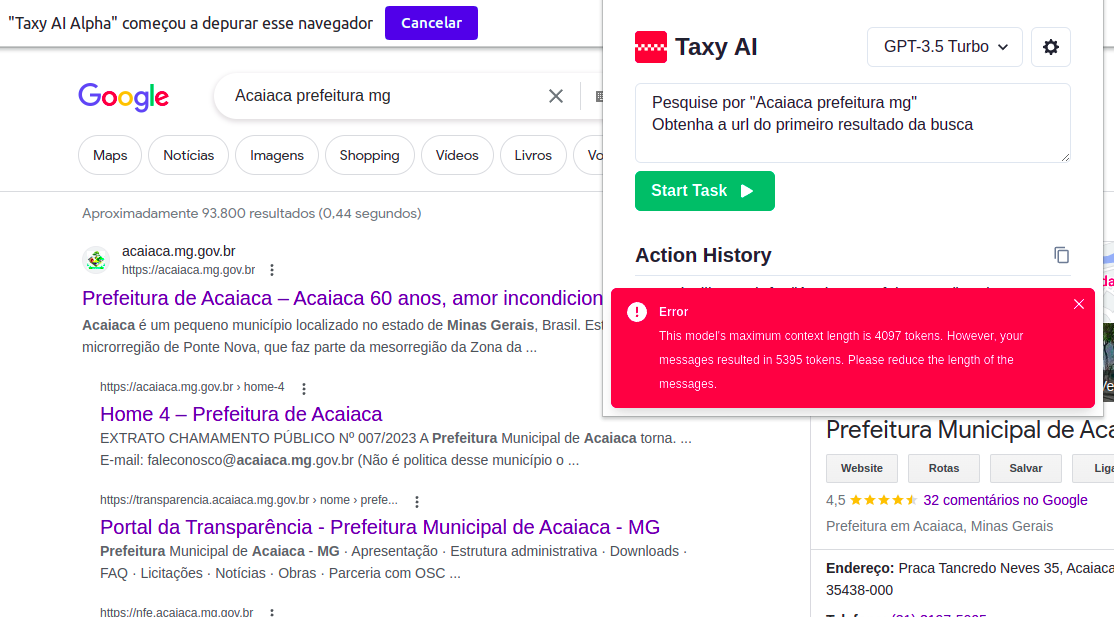